In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import random
import seaborn as sns

pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update({'font.size': 15})

In [2]:
data = pd.read_excel('final_output.xlsx')
pd.set_option('display.max_columns', None)
data.head()

id                                                uri  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha   
1  710804       710804-nabidka-prodej-bytu-na-dlouhych-plzen   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno   
3  710799  710799-nabidka-prodej-bytu-jozefa-gabcika-pard...   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...   

                         date        lat        lng    price currency  \
0  2022-03-17 13:35:07.000000  50.069999  14.382026    22500      CZK   
1  2022-03-17 13:29:19.000000  49.750050  13.415810  4550000      CZK   
2  2022-03-17 13:16:19.000000  49.188190  16.588290    10000      CZK   
3  2022-03-17 12:54:55.000000  50.052230  15.751670  6690000      CZK   
4  2022-03-17 12:47:54.000000  50.051150  14.457670    16000      CZK   

  keyOfferType keyDisposition  surface  surfaceLand  \
0     pronajem           1-kk       35          NaN   
1       prodej            3-1       74          0.0   
2     pronajem            1-1       38          0.0   
3       prodej           3-kk       80          0.0   
4     pronajem           3-kk       78          0.0   

                                                 url Dispozice Plocha  \
0  https://www.bezrealitky.cz/nemovitosti-byty-do...      1+kk  35 m²   
1  https://www.bezrealitky.cz/nemovitosti-byty-do...       3+1  74 m²   
2  https://www.bezrealitky.cz/nemovitosti-byty-do...       1+1  38 m²   
3  https://www.bezrealitky.cz/nemovitosti-byty-do...      3+kk  80 m²   
4  https://www.bezrealitky.cz/nemovitosti-byty-do...      3+kk  78 m²   

           Cena  Poplatky  Vybavenost  Podlaží Balkón Terasa Sklep Lodžie  \
0     22.500 Kč  7.500 Kč    Vybavený      6.0    Ano     Ne    Ne     Ne   
1  4.550.000 Kč       NaN  Nevybavený      4.0    Ano     Ne   Ano    Ano   
2     10.000 Kč  4.000 Kč    Vybavený      1.0    Ano     Ne   Ano     Ne   
3  6.690.000 Kč       NaN    Částečně      4.0    Ano     Ne   Ano     Ne   
4     16.000 Kč  6.000 Kč    Vybavený      2.0     Ne     Ne    Ne    Ano   

  Parkování Výtah Garáž K dispozici od Zastávka veřejné dopravy    Pošta  \
0        Ne   Ano   Ano   01. 05. 2022                    202 m    523 m   
1       Ano   Ano    Ne   17. 03. 2022                     63 m    111 m   
2       Ano   Ano    Ne   01. 05. 2022                    177 m  1,193 m   
3       Ano   Ano    Ne   01. 07. 2022                    408 m    774 m   
4        Ne    Ne    Ne   15. 04. 2022                    128 m    650 m   

  Obchod    Banka Restaurace Lékárna  Škola Mateřská škola Sportoviště  \
0  119 m    828 m      248 m   936 m  219 m          756 m     1,073 m   
1  311 m   2.8 km      359 m   428 m  259 m          645 m       665 m   
2  300 m    543 m       54 m   531 m  554 m          212 m       777 m   
3  839 m  1,037 m      713 m   690 m  797 m          623 m      4.0 km   
4   96 m    653 m      133 m   531 m  348 m          604 m       641 m   

    Hřiště         Stav Typ vlastnictví Typ budovy PENB Vratná kauce  \
0    529 m          NaN             NaN        NaN  NaN          NaN   
1    170 m  Velmi dobrý          Osobní      Panel    C          NaN   
2  1,017 m  Velmi dobrý          Osobní      Cihla    G    10.000 Kč   
3    198 m   Novostavba          Osobní      Cihla    C          NaN   
4    358 m        Dobrý          Osobní      Cihla    G    21.000 Kč   

                                   Provedení      Typ vytápění  \
0                                        NaN               NaN   
1                                        NaN               NaN   
2  standardní: běžné materiály a technologie  ústřední dálkové   
3                                        NaN               NaN   
4                                        NaN               NaN   

  Administrační poplatek Podlaží v rámci domu Rekonstrukce Stáří Novostavba  \
0                    NaN                  NaN          NaN   NaN        NaN   
1                    NaN                  NaN          NaN  

In [4]:
data.shape

(3546, 54)

In [5]:
# Drop and rename columns

data.drop(['date', 'surfaceLand', 'Dispozice', 'Plocha', 'Cena', 'K dispozici od', 'Provedení', 'Typ vytápění', 
           'Administrační poplatek', 'Podlaží v rámci domu', 'Rekonstrukce', 'Stáří', 'Novostavba',
           'Předzahrádka', 'Developer', 'Název projektu', 'Kód jednotky', 'url_x', 'url_y'],
         axis=1, inplace=True)

data.rename(columns={
    'keyOfferType': 'key_offer_type',
    'keyDisposition': 'key_disposition',
    'Poplatky': 'utilities',
    'Vybavenost': 'facilities',
    'Podlaží': 'floor',
    'Balkón': 'balcony',
    'Terasa': 'terrace',
    'Sklep': 'cellar',
    'Lodžie': 'loggia',
    'Parkování': 'parking',
    'Výtah': 'elevator',
    'Garáž': 'garage',
    'Zastávka veřejné dopravy': 'public_transport_stop',
    'Pošta': 'post_office',
    'Obchod': 'store',
    'Banka': 'bank',
    'Restaurace': 'restaurant',
    'Lékárna': 'pharmacy',
    'Škola': 'school',
    'Mateřská škola': 'kindergarten',
    'Sportoviště': 'sport_field',
    'Hřiště': 'playground',
    'Stav': 'condition',
    'Typ vlastnictví': 'property_type',
    'Typ budovy': 'building_type',
    'PENB': 'penb',
    'Vratná kauce': 'deposit',
}, inplace=True)

data.head()

id                                                uri        lat  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha  50.069999   
1  710804       710804-nabidka-prodej-bytu-na-dlouhych-plzen  49.750050   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno  49.188190   
3  710799  710799-nabidka-prodej-bytu-jozefa-gabcika-pard...  50.052230   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...  50.051150   

         lng    price currency key_offer_type key_disposition  surface  \
0  14.382026    22500      CZK       pronajem            1-kk       35   
1  13.415810  4550000      CZK         prodej             3-1       74   
2  16.588290    10000      CZK       pronajem             1-1       38   
3  15.751670  6690000      CZK         prodej            3-kk       80   
4  14.457670    16000      CZK       pronajem            3-kk       78   

                                                 url utilities  facilities  \
0  https://www.bezrealitky.cz/nemovitosti-byty-do...  7.500 Kč    Vybavený   
1  https://www.bezrealitky.cz/nemovitosti-byty-do...       NaN  Nevybavený   
2  https://www.bezrealitky.cz/nemovitosti-byty-do...  4.000 Kč    Vybavený   
3  https://www.bezrealitky.cz/nemovitosti-byty-do...       NaN    Částečně   
4  https://www.bezrealitky.cz/nemovitosti-byty-do...  6.000 Kč    Vybavený   

   floor balcony terrace cellar loggia parking elevator garage  \
0    6.0     Ano      Ne     Ne     Ne      Ne      Ano    Ano   
1    4.0     Ano      Ne    Ano    Ano     Ano      Ano     Ne   
2    1.0     Ano      Ne    Ano     Ne     Ano      Ano     Ne   
3    4.0     Ano      Ne    Ano     Ne     Ano      Ano     Ne   
4    2.0      Ne      Ne     Ne    Ano      Ne       Ne     Ne   

  public_transport_stop post_office  store     bank restaurant pharmacy  \
0                 202 m       523 m  119 m    828 m      248 m    936 m   
1                  63 m       111 m  311 m   2.8 km      359 m    428 m   
2                 177 m     1,193 m  300 m    543 m       54 m    531 m   
3                 408 m       774 m  839 m  1,037 m      713 m    690 m   
4                 128 m       650 m   96 m    653 m      133 m    531 m   

  school kindergarten sport_field playground    condition property_type  \
0  219 m        756 m     1,073 m      529 m          NaN           NaN   
1  259 m        645 m       665 m      170 m  Velmi dobrý        Osobní   
2  554 m        212 m       777 m    1,017 m  Velmi dobrý        Osobní   
3  797 m        623 m      4.0 km      198 m   Novostavba        Osobní   
4  348 m        604 m       641 m      358 m        Dobrý        Osobní   

  building_type penb    deposit  
0           NaN  NaN        NaN  
1         Panel    C        NaN  
2         Cihla    G  10.000 Kč  
3         Cihla    C        NaN  
4         Cihla    G  21.000 Kč

In [6]:
data.shape

(3546, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3546 non-null   int64  
 1   uri                    3546 non-null   object 
 2   lat                    3546 non-null   float64
 3   lng                    3546 non-null   float64
 4   price                  3546 non-null   int64  
 5   currency               3546 non-null   object 
 6   key_offer_type         3546 non-null   object 
 7   key_disposition        3545 non-null   object 
 8   surface                3546 non-null   int64  
 9   url                    3303 non-null   object 
 10  utilities              2239 non-null   object 
 11  facilities             3101 non-null   object 
 12  floor                  3404 non-null   float64
 13  balcony                3546 non-null   object 
 14  terrace                3546 non-null   object 
 15  cell

In [8]:
df = data.copy()

# Drop columns

df.drop('url', axis=1, inplace=True)

In [9]:
# Transorm binary attributes to 0/1

binary_attributes = ['balcony', 'terrace', 'cellar', 'loggia', 'parking', 'elevator', 'garage']

for attribute in binary_attributes:
    df[attribute] = df[attribute].map({'Ano': 1, 'Ne': 0})
    
df.head()

id                                                uri        lat  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha  50.069999   
1  710804       710804-nabidka-prodej-bytu-na-dlouhych-plzen  49.750050   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno  49.188190   
3  710799  710799-nabidka-prodej-bytu-jozefa-gabcika-pard...  50.052230   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...  50.051150   

         lng    price currency key_offer_type key_disposition  surface  \
0  14.382026    22500      CZK       pronajem            1-kk       35   
1  13.415810  4550000      CZK         prodej             3-1       74   
2  16.588290    10000      CZK       pronajem             1-1       38   
3  15.751670  6690000      CZK         prodej            3-kk       80   
4  14.457670    16000      CZK       pronajem            3-kk       78   

  utilities  facilities  floor  balcony  terrace  cellar  loggia  parking  \
0  7.500 Kč    Vybavený    6.0        1        0       0       0        0   
1       NaN  Nevybavený    4.0        1        0       1       1        1   
2  4.000 Kč    Vybavený    1.0        1        0       1       0        1   
3       NaN    Částečně    4.0        1        0       1       0        1   
4  6.000 Kč    Vybavený    2.0        0        0       0       1        0   

   elevator  garage public_transport_stop post_office  store     bank  \
0         1       1                 202 m       523 m  119 m    828 m   
1         1       0                  63 m       111 m  311 m   2.8 km   
2         1       0                 177 m     1,193 m  300 m    543 m   
3         1       0                 408 m       774 m  839 m  1,037 m   
4         0       0                 128 m       650 m   96 m    653 m   

  restaurant pharmacy school kindergarten sport_field playground    condition  \
0      248 m    936 m  219 m        756 m     1,073 m      529 m          NaN   
1      359 m    428 m  259 m        645 m       665 m      170 m  Velmi dobrý   
2       54 m    531 m  554 m        212 m       777 m    1,017 m  Velmi dobrý   
3      713 m    690 m  797 m        623 m      4.0 km      198 m   Novostavba   
4      133 m    531 m  348 m        604 m       641 m      358 m        Dobrý   

  property_type building_type penb    deposit  
0           NaN           NaN  NaN        NaN  
1        Osobní         Panel    C        NaN  
2        Osobní         Cihla    G  10.000 Kč  
3        Osobní         Cihla    C        NaN  
4        Osobní         Cihla    G  21.000 Kč

In [10]:
# Transform string attributes with area info to float

area_info_attributes = ['public_transport_stop', 'post_office', 'store', 'bank', 'restaurant',
                       'pharmacy', 'school', 'kindergarten', 'sport_field', 'playground']

for attribute in area_info_attributes:
    df[attribute] = df[attribute].apply(lambda x: float(str(x).replace(' m', '').replace(',', '')) 
                                        if ' m' in str(x) 
                                        else float(str(x).replace(' km', '')) * 1000)

df.head()

id                                                uri        lat  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha  50.069999   
1  710804       710804-nabidka-prodej-bytu-na-dlouhych-plzen  49.750050   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno  49.188190   
3  710799  710799-nabidka-prodej-bytu-jozefa-gabcika-pard...  50.052230   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...  50.051150   

         lng    price currency key_offer_type key_disposition  surface  \
0  14.382026    22500      CZK       pronajem            1-kk       35   
1  13.415810  4550000      CZK         prodej             3-1       74   
2  16.588290    10000      CZK       pronajem             1-1       38   
3  15.751670  6690000      CZK         prodej            3-kk       80   
4  14.457670    16000      CZK       pronajem            3-kk       78   

  utilities  facilities  floor  balcony  terrace  cellar  loggia  parking  \
0  7.500 Kč    Vybavený    6.0        1        0       0       0        0   
1       NaN  Nevybavený    4.0        1        0       1       1        1   
2  4.000 Kč    Vybavený    1.0        1        0       1       0        1   
3       NaN    Částečně    4.0        1        0       1       0        1   
4  6.000 Kč    Vybavený    2.0        0        0       0       1        0   

   elevator  garage  public_transport_stop  post_office  store    bank  \
0         1       1                  202.0        523.0  119.0   828.0   
1         1       0                   63.0        111.0  311.0  2800.0   
2         1       0                  177.0       1193.0  300.0   543.0   
3         1       0                  408.0        774.0  839.0  1037.0   
4         0       0                  128.0        650.0   96.0   653.0   

   restaurant  pharmacy  school  kindergarten  sport_field  playground  \
0       248.0     936.0   219.0         756.0       1073.0       529.0   
1       359.0     428.0   259.0         645.0        665.0       170.0   
2        54.0     531.0   554.0         212.0        777.0      1017.0   
3       713.0     690.0   797.0         623.0       4000.0       198.0   
4       133.0     531.0   348.0         604.0        641.0       358.0   

     condition property_type building_type penb    deposit  
0          NaN           NaN           NaN  NaN        NaN  
1  Velmi dobrý        Osobní         Panel    C        NaN  
2  Velmi dobrý        Osobní         Cihla    G  10.000 Kč  
3   Novostavba        Osobní         Cihla    C        NaN  
4        Dobrý        Osobní         Cihla    G  21.000 Kč

In [11]:
# Drop rows with type of ad "spolubydleni"

df = df[df['key_offer_type'] != 'spolubydleni']
df['key_offer_type'].value_counts()

pronajem    2456
prodej      1000
Name: key_offer_type, dtype: int64

In [12]:
# Drop rows with ads from Slovakia

df = df[~df['key_disposition'].isin(['1-izb', '2-izb', '3-izb', '4-izb'])]


df['key_disposition'].value_counts()

2-kk          859
2-1           626
1-kk          555
1-1           403
3-1           373
3-kk          336
garsoniera    113
4-1            65
4-kk           62
ostatni        11
5-1             9
5-kk            9
6-kk            2
7-kk            1
6-1             1
Name: key_disposition, dtype: int64

In [13]:
# Leave only records in CZK

print(f'Before: {len(df)} rows')
df = df[df['currency'] == 'CZK']
print(f'After: {len(df)} rows')

Before: 3426 rows
After: 3348 rows


### Surface

In [14]:
# Drop rows where surface is 0

print(f'Before: {len(df)} rows')
df = df[df['surface'] != 0]
print(f'After: {len(df)} rows')

Before: 3348 rows
After: 3337 rows


### Key disposition

In [15]:
df['key_disposition'].value_counts()

2-kk          854
2-1           594
1-kk          555
1-1           379
3-1           356
3-kk          335
garsoniera    108
4-kk           62
4-1            60
ostatni        11
5-1             9
5-kk            9
6-kk            2
7-kk            1
6-1             1
Name: key_disposition, dtype: int64

In [16]:
# Merge small groups


df['key_disposition'] = df['key_disposition'].replace(['5-kk', '5-1', '6-kk', '6-1', '7-kk', 'ostatni'], 'ostatní')

In [17]:
attributes_with_currency = ['utilities', 'deposit']

for attribute in attributes_with_currency:
    df[attribute] = df[attribute].apply(lambda x: int(x.replace('Kč', '').replace('.', '').replace('€', '').strip()) 
                                        if not pd.isnull(x) 
                                        else None)

df.head()

id                                                uri        lat  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha  50.069999   
1  710804       710804-nabidka-prodej-bytu-na-dlouhych-plzen  49.750050   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno  49.188190   
3  710799  710799-nabidka-prodej-bytu-jozefa-gabcika-pard...  50.052230   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...  50.051150   

         lng    price currency key_offer_type key_disposition  surface  \
0  14.382026    22500      CZK       pronajem            1-kk       35   
1  13.415810  4550000      CZK         prodej             3-1       74   
2  16.588290    10000      CZK       pronajem             1-1       38   
3  15.751670  6690000      CZK         prodej            3-kk       80   
4  14.457670    16000      CZK       pronajem            3-kk       78   

   utilities  facilities  floor  balcony  terrace  cellar  loggia  parking  \
0     7500.0    Vybavený    6.0        1        0       0       0        0   
1        NaN  Nevybavený    4.0        1        0       1       1        1   
2     4000.0    Vybavený    1.0        1        0       1       0        1   
3        NaN    Částečně    4.0        1        0       1       0        1   
4     6000.0    Vybavený    2.0        0        0       0       1        0   

   elevator  garage  public_transport_stop  post_office  store    bank  \
0         1       1                  202.0        523.0  119.0   828.0   
1         1       0                   63.0        111.0  311.0  2800.0   
2         1       0                  177.0       1193.0  300.0   543.0   
3         1       0                  408.0        774.0  839.0  1037.0   
4         0       0                  128.0        650.0   96.0   653.0   

   restaurant  pharmacy  school  kindergarten  sport_field  playground  \
0       248.0     936.0   219.0         756.0       1073.0       529.0   
1       359.0     428.0   259.0         645.0        665.0       170.0   
2        54.0     531.0   554.0         212.0        777.0      1017.0   
3       713.0     690.0   797.0         623.0       4000.0       198.0   
4       133.0     531.0   348.0         604.0        641.0       358.0   

     condition property_type building_type penb  deposit  
0          NaN           NaN           NaN  NaN      NaN  
1  Velmi dobrý        Osobní         Panel    C      NaN  
2  Velmi dobrý        Osobní         Cihla    G  10000.0  
3   Novostavba        Osobní         Cihla    C      NaN  
4        Dobrý        Osobní         Cihla    G  21000.0

In [18]:
categorical_attributes = ['currency', 'key_offer_type', 'key_disposition', 'facilities', 'floor', 
                          'condition', 'property_type', 'building_type', 'penb'] + binary_attributes


for attribute in categorical_attributes:
    df[attribute] = df[attribute].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3544
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     3337 non-null   int64   
 1   uri                    3337 non-null   object  
 2   lat                    3337 non-null   float64 
 3   lng                    3337 non-null   float64 
 4   price                  3337 non-null   int64   
 5   currency               3337 non-null   category
 6   key_offer_type         3337 non-null   category
 7   key_disposition        3336 non-null   category
 8   surface                3337 non-null   int64   
 9   utilities              2085 non-null   float64 
 10  facilities             2901 non-null   category
 11  floor                  3205 non-null   category
 12  balcony                3337 non-null   category
 13  terrace                3337 non-null   category
 14  cellar                 3337 non-null   c

In [20]:
df.describe()

id          lat          lng         price      surface  \
count    3337.000000  3337.000000  3337.000000  3.337000e+03  3337.000000   
mean   650161.436320    49.944425    15.209384  1.812333e+06    56.719209   
std    121483.416534     0.365503     1.472791  3.564728e+06    26.598849   
min      6603.000000    48.639230    12.185680  1.000000e+00    12.000000   
25%    659626.000000    49.796223    14.406380  1.080000e+04    40.000000   
50%    706049.000000    50.058253    14.482470  1.520000e+04    53.000000   
75%    709327.000000    50.101639    16.159837  2.700000e+06    68.000000   
max    711040.000000    50.899100    18.727960  4.290000e+07   450.000000   

          utilities  public_transport_stop   post_office         store  \
count   2085.000000            3337.000000   3337.000000   3337.000000   
mean    3375.455156             296.723404    837.961942    492.316152   
std     2793.795363             403.023868    980.098229   1040.604691   
min        1.000000               0.000000      0.000000      0.000000   
25%     2000.000000             141.000000    417.000000    152.000000   
50%     3000.000000             226.000000    658.000000    288.000000   
75%     4000.000000             341.000000    987.000000    498.000000   
max    36750.000000            9300.000000  36500.000000  36100.000000   

               bank    restaurant      pharmacy        school  kindergarten  \
count   3270.000000   3337.000000   3323.000000   3325.000000   3295.000000   
mean    1409.702141    519.047947    886.569064    745.028271   1123.507132   
std     2179.299908   1246.725538   1462.113194   1110.702422   1691.052453   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      380.000000    145.000000    292.000000    296.000000    371.000000   
50%      737.500000    305.000000    490.000000    466.000000    608.000000   
75%     1358.750000    526.000000    819.000000    739.000000   1089.000000   
max    28400.000000  37200.000000  14600.000000  17900.000000  35300.000000   

        sport_field    playground        deposit  
count   3303.000000   3333.000000    2161.000000  
mean    1237.716924    633.267027   20625.354466  
std     1559.659804   1128.052318   10528.208619  
min        3.000000      1.000000       1.000000  
25%      463.000000    213.000000   13900.000000  
50%      777.000000    360.000000   18500.000000  
75%     1248.000000    587.000000   25000.000000  
max    24300.000000  15900.000000  165000.000000

In [21]:
df['key_offer_type'].value_counts()

pronajem    2359
prodej       978
Name: key_offer_type, dtype: int64

In [22]:
df_null_values = pd.DataFrame(df.isnull().sum(), columns=['sum_null_values'])
df_null_values = df_null_values[df_null_values['sum_null_values'] != 0]
df_null_values

sum_null_values
key_disposition                1
utilities                   1252
facilities                   436
floor                        132
bank                          67
pharmacy                      14
school                        12
kindergarten                  42
sport_field                   34
playground                     4
condition                    419
property_type                100
building_type                 93
penb                         558
deposit                     1176

## Missing values

### Area info attributes

In [23]:
area_info_attributes = ['public_transport_stop', 'post_office', 'store', 'bank', 'restaurant',
                       'pharmacy', 'school', 'kindergarten', 'sport_field', 'playground']

# Rate of missing values
missing_values_count = df[area_info_attributes].isna().any(axis=1).sum()

f'Missing values rate: {round(missing_values_count/len(df)*100, 2)} %'

'Missing values rate: 2.97 %'

In [24]:
print(f'Before: {len(df)} rows')
df.dropna(axis=0, how='any', subset=area_info_attributes, inplace=True)
print(f'After: {len(df)} rows')

Before: 3337 rows
After: 3238 rows


### Floor

In [25]:
df['floor'].value_counts()

1.0     760
2.0     700
3.0     604
4.0     389
5.0     266
6.0     151
7.0      68
8.0      60
9.0      25
10.0     25
-1.0     20
11.0     17
12.0     10
13.0      8
14.0      2
19.0      2
21.0      1
48.0      1
Name: floor, dtype: int64

In [26]:
df_1_to_5_floor = df[df['floor'].isin([1, 2, 3, 4, 5])]
print(f'1st to 5th floor: {len(df_1_to_5_floor)}')
print(f'All floors: {len(df)}')
print(f'1st to 5th floor share: {round(len(df_1_to_5_floor) / len(df)*100, 2)} %')

1st to 5th floor: 2719
All floors: 3238
1st to 5th floor share: 83.97 %


In [27]:
# Filling missing values

floors = [1, 2, 3, 4, 5]

random.seed(17)
 
df_floor_missing_values = df['floor'].isnull()   # Missing values

df_floor_missing_values_count = df_floor_missing_values.sum()    # Count of missing values

random_floors = random.choices(floors, k=df_floor_missing_values_count)   # List of random floors

df.loc[df_floor_missing_values, 'floor'] = random_floors    # Assigning list

In [28]:
df['floor'].isnull().sum()

0

### Facilities

In [29]:
df['facilities'].value_counts()

Částečně      1368
Vybavený       945
Nevybavený     497
Name: facilities, dtype: int64

In [30]:
# Add new category

df['facilities'] = df['facilities'].cat.add_categories('None').fillna('None')

In [31]:
df['facilities'].value_counts()

Částečně      1368
Vybavený       945
Nevybavený     497
None           428
Name: facilities, dtype: int64

### Condition

In [32]:
df['condition'].value_counts()

Velmi dobrý    1651
Dobrý           607
Novostavba      535
Špatný           20
Ve výstavbě      11
Name: condition, dtype: int64

In [33]:
# Add new category

df['condition'] = df['condition'].cat.add_categories('None').fillna('None')

### Building type

In [34]:
df['building_type'].value_counts()

Cihla               2011
Panel                885
Ostatní              157
Nízkoenergetický      84
Dřevostavba            8
Name: building_type, dtype: int64

In [35]:
# Add new category

df['building_type'] = df['building_type'].cat.add_categories('None').fillna('None')

### PENB

In [36]:
df['penb'].value_counts()

G    1236
C     452
B     379
D     236
E     193
A     164
F      33
Name: penb, dtype: int64

In [37]:
# Add new category

df['penb'] = df['penb'].cat.add_categories('None').fillna('None')

### Property type

In [38]:
df['property_type'].value_counts()

Osobní        2851
Družstevní     253
Ostatní         34
Name: property_type, dtype: int64

In [39]:
df['property_type'].fillna('Osobní', inplace=True)

## Preprocessing rent data

In [40]:
df_rent = df[df['key_offer_type'] == 'pronajem']

df_rent_null_values = pd.DataFrame(df_rent.isnull().sum(), columns=['sum_null_values'])
df_rent_null_values = df_rent_null_values[df_rent_null_values['sum_null_values'] != 0]
df_rent_null_values

sum_null_values
utilities              272
deposit                193

### Price

In [41]:
# Remove meaningless records

print(f'Before: {len(df_rent)} rows')
df_rent = df_rent.loc[df_rent['price'] > 1500]
print(f'After: {len(df_rent)} rows')

Before: 2304 rows
After: 2302 rows


### Deposit

In [42]:
# Adding new attribute deposit_by_price = deposit / price

df_rent['deposit_by_price'] = df['deposit'] / df['price']
df_rent.head()

id                                                uri        lat  \
0  710805      710805-nabidka-pronajem-bytu-hlavackova-praha  50.069999   
2  710803        710803-nabidka-pronajem-bytu-veletrzni-brno  49.188190   
4  710797  710797-nabidka-pronajem-bytu-michelska-hlavni-...  50.051150   
7  710794         710794-nabidka-pronajem-bytu-korunni-praha  50.075535   
8  710789               710789-nabidka-pronajem-bytu-k-hajku  49.692797   

         lng  price currency key_offer_type key_disposition  surface  \
0  14.382026  22500      CZK       pronajem            1-kk       35   
2  16.588290  10000      CZK       pronajem             1-1       38   
4  14.457670  16000      CZK       pronajem            3-kk       78   
7  14.445289  37500      CZK       pronajem            2-kk       60   
8  18.347021   9850      CZK       pronajem             3-1       78   

   utilities facilities floor balcony terrace cellar loggia parking elevator  \
0     7500.0   Vybavený   6.0       1       0      0      0       0        1   
2     4000.0   Vybavený   1.0       1       0      1      0       1        1   
4     6000.0   Vybavený   2.0       0       0      0      1       0        0   
7    12500.0   Vybavený   1.0       0       0      0      0       0        0   
8        NaN       None   5.0       1       0      1      0       1        0   

  garage  public_transport_stop  post_office  store   bank  restaurant  \
0      1                  202.0        523.0  119.0  828.0       248.0   
2      0                  177.0       1193.0  300.0  543.0        54.0   
4      0                  128.0        650.0   96.0  653.0       133.0   
7      0                   96.0        290.0   15.0  494.0        73.0   
8      0                  262.0        551.0  567.0  967.0       555.0   

   pharmacy  school  kindergarten  sport_field  playground    condition  \
0     936.0   219.0         756.0       1073.0       529.0         None   
2     531.0   554.0         212.0        777.0      1017.0  Velmi dobrý   
4     531.0   348.0         604.0        641.0       358.0        Dobrý   
7     336.0   519.0         216.0        542.0       280.0         None   
8     723.0   170.0         329.0        734.0       120.0  Velmi dobrý   

  property_type building_type  penb  deposit  deposit_by_price  
0        Osobní          None  None      NaN               NaN  
2        Osobní         Cihla     G  10000.0            1.0000  
4        Osobní         Cihla     G  21000.0            1.3125  
7        Osobní          None  None      NaN               NaN  
8        Osobní         Panel     D  19700.0            2.0000

In [43]:
df_rent['deposit_by_price'].describe()

count    2110.000000
mean        1.642455
std         0.552674
min         0.000053
25%         1.180015
50%         1.666667
75%         2.000000
max         4.255319
Name: deposit_by_price, dtype: float64

In [44]:
# Filling missing values

median_deposit_by_price = df_rent['deposit_by_price'].median()
df_rent['deposit'].fillna(df_rent['price']*median_deposit_by_price, inplace=True)
df_rent['deposit_by_price'].fillna(median_deposit_by_price, inplace=True)

In [45]:
# Outliers

z_score_deposit_by_price = np.abs(stats.zscore(df_rent['deposit_by_price']))
df_rent_deposit_by_price_outliers = df_rent[z_score_deposit_by_price > 3]

print(f'Number of outliers: {len(df_rent_deposit_by_price_outliers)}')

Number of outliers: 23


In [45]:
print(f'Before: {len(df_rent)} rows')
df_rent = pd.concat([df_rent, df_rent_deposit_by_price_outliers]).drop_duplicates(keep=False)
print(f'After: {len(df_rent)} rows')

Before: 2302 rows
After: 2279 rows


<AxesSubplot:xlabel='price', ylabel='deposit'>

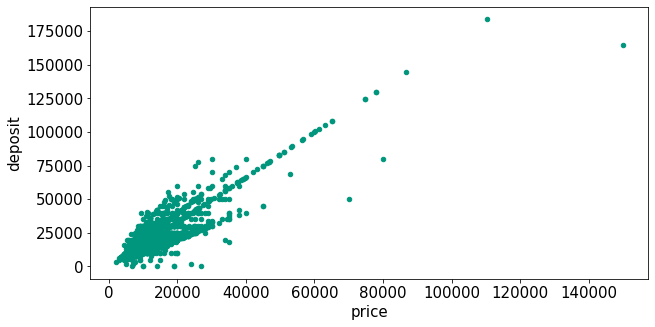

In [46]:
df_rent.plot.scatter('price', 'deposit', c='#00957d')

### Utilities

In [47]:
# Filling missing values

median_utilities = df_rent['utilities'].median()
df_rent['utilities'].fillna(df_rent['price']*median_deposit_by_price, inplace=True)

In [48]:
# Outliers

z_score_utilities = np.abs(stats.zscore(df_rent['utilities']))
df_rent_utilities_outliers = df_rent[z_score_utilities > 3]
print(f'Number of outliers: {len(df_rent_utilities_outliers)}')

Number of outliers: 40


In [49]:
print(f'Before: {len(df_rent)} rows')
df_rent = pd.concat([df_rent, df_rent_utilities_outliers]).drop_duplicates(keep=False)
print(f'After: {len(df_rent)} rows')

Before: 2302 rows
After: 2262 rows


In [50]:
print(f'Before: {len(df_rent)} rows')
df_rent = df_rent.loc[df_rent['utilities'] > 100]
print(f'After: {len(df_rent)} rows')

Before: 2262 rows
After: 2242 rows


<AxesSubplot:xlabel='price', ylabel='utilities'>

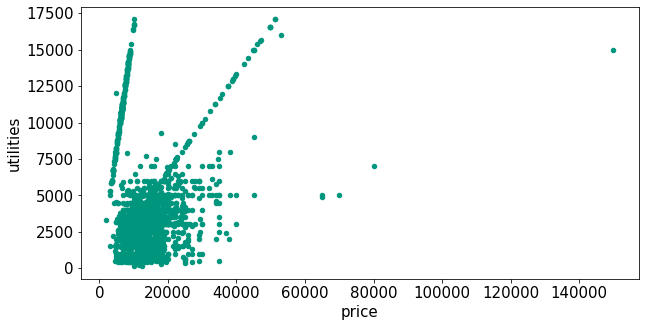

In [54]:
df_rent.plot.scatter('price', 'utilities', c='#00957d')

### Checking missing values

In [55]:
df_rent_null_values = pd.DataFrame(df_rent.isnull().sum(), columns=['sum_null_values'])
df_rent_null_values = df_rent_null_values[df_rent_null_values['sum_null_values'] != 0]
df_rent_null_values

Empty DataFrame
Columns: [sum_null_values]
Index: []

In [56]:
df_rent.shape

(2242, 35)

## Preprocessing sell data

In [57]:
df_sell = df[df['key_offer_type'] == 'prodej']
# df_sell.drop(['utilities', 'deposit'], axis=1, inplace=True)

df_sell_null_values = pd.DataFrame(df_sell.isnull().sum(), columns=['sum_null_values'])
df_sell_null_values = df_sell_null_values[df_sell_null_values['sum_null_values'] != 0]
df_sell_null_values

sum_null_values
key_disposition                1
utilities                    934
deposit                      934

In [58]:
df_sell.shape

(934, 34)

In [59]:
df_sell[df_sell['key_disposition'].isnull()]

id                                  uri        lat        lng  \
2248  691939  691939-nabidka-prodej-bytu-cukrovar  49.244742  17.464484   

        price currency key_offer_type key_disposition  surface  utilities  \
2248  1449000      CZK         prodej             NaN      221        NaN   

     facilities floor balcony terrace cellar loggia parking elevator garage  \
2248       None   3.0       0       0      0      0       0        0      0   

      public_transport_stop  post_office  store    bank  restaurant  pharmacy  \
2248                  805.0        387.0  565.0  9000.0       628.0    1157.0   

      school  kindergarten  sport_field  playground condition property_type  \
2248  1252.0        1255.0       6400.0      1191.0     Dobrý        Osobní   

     building_type  penb  deposit  
2248         Cihla  None      NaN

In [60]:
print(f'Before: {len(df_sell)} rows')
df_sell.dropna(axis=0, subset=['key_disposition'], inplace=True)
print(f'After: {len(df_sell)} rows')

Before: 934 rows
After: 933 rows


### Price

In [61]:
# Remove meaningless records

print(f'Before: {len(df_sell)} rows')
df_sell = df_sell.loc[df_sell['price'] > 200_000]
print(f'After: {len(df_sell)} rows')

Before: 933 rows
After: 931 rows


### Checking missing values

In [62]:
df_sell_null_values = pd.DataFrame(df_sell.isnull().sum(), columns=['sum_null_values'])
df_sell_null_values = df_sell_null_values[df_sell_null_values['sum_null_values'] != 0]
df_sell_null_values

sum_null_values
utilities              931
deposit                931

In [63]:
df_sell.shape

(931, 34)

## Export

In [61]:
df_rent.reset_index(inplace=True)
df_rent.to_excel('rent_data.xlsx')

In [62]:
df_sell.to_excel('sell_data.xlsx')

In [64]:
df_all = pd.concat([df_rent, df_sell])
df_all.to_excel('data_all.xlsx')

In [64]:
df_all.shape

(3151, 35)

### Correlations

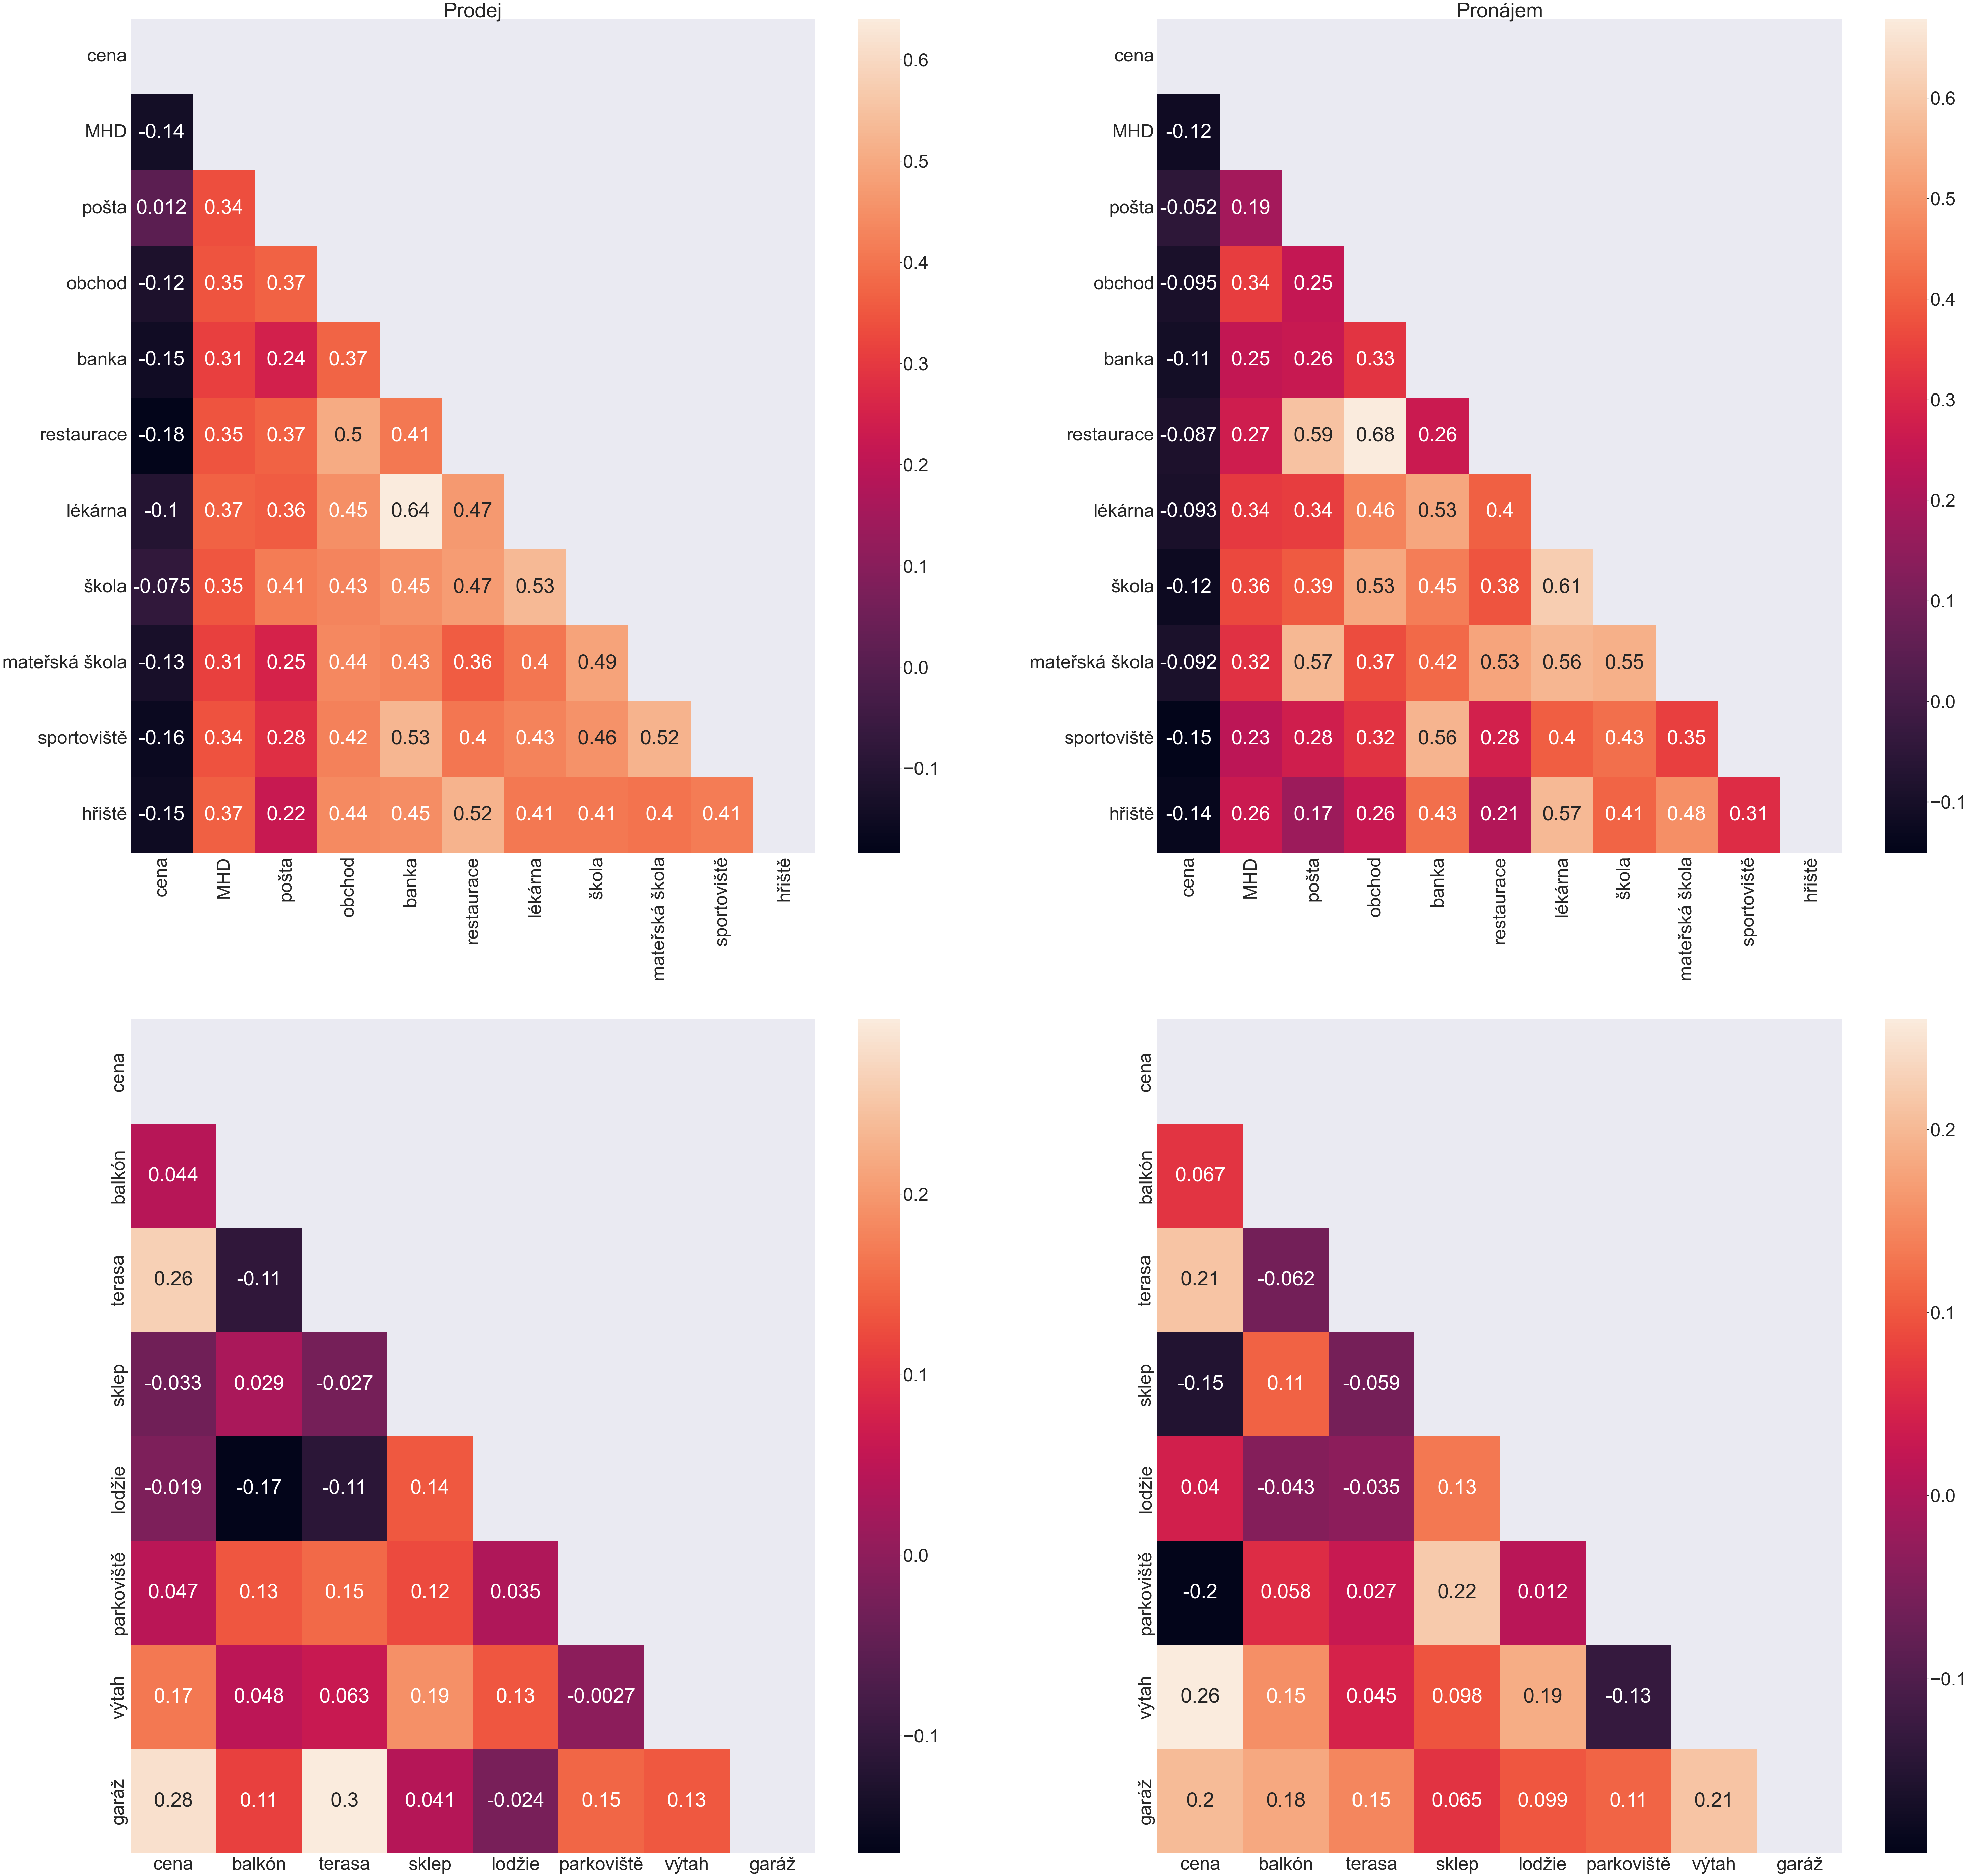

In [74]:
corr_area_attr_sell = df_sell[['price'] + area_info_attributes].corr()
corr_area_attr_rent = df_rent[['price'] + area_info_attributes].corr()

x_sell = df_sell[['price'] + binary_attributes].values
x_rent = df_rent[['price'] + binary_attributes].values

corr_bin_attr_sell = np.corrcoef(x_sell.T)
corr_bin_attr_rent = np.corrcoef(x_rent.T)

matrix_area_sell = np.triu(corr_area_attr_sell)
matrix_area_rent = np.triu(corr_area_attr_rent)

matrix_bin_sell = np.triu(corr_bin_attr_sell)
matrix_bin_rent = np.triu(corr_bin_attr_rent)

labels_area = ['cena', 'MHD', 'pošta', 'obchod', 'banka', 'restaurace', 'lékárna', 
               'škola', 'mateřská škola', 'sportoviště', 'hřiště']

labels_binary = ['cena', 'balkón', 'terasa', 'sklep', 'lodžie', 'parkoviště', 'výtah', 'garáž']

fig, axs = plt.subplots(ncols=2, nrows=2)

sns.heatmap(corr_area_attr_sell, 
            annot=True, 
            mask=matrix_area_sell, 
            xticklabels=labels_area, 
            yticklabels=labels_area, 
            ax=axs[0][0])

sns.heatmap(corr_area_attr_rent, 
            annot=True, 
            mask=matrix_area_rent, 
            xticklabels=labels_area, 
            yticklabels=labels_area, 
            ax=axs[0][1])

axs[0][0].set_title('Prodej')
axs[0][1].set_title('Pronájem')

sns.heatmap(corr_bin_attr_sell, 
            annot=True, 
            mask=matrix_bin_sell, 
            xticklabels=labels_binary, 
            yticklabels=labels_binary, 
            ax=axs[1][0])

sns.heatmap(corr_bin_attr_rent, 
            annot=True, 
            mask=matrix_bin_rent, 
            xticklabels=labels_binary,
            yticklabels=labels_binary,
            ax=axs[1][1])

sns.set(rc={'figure.figsize':(100, 100)}, font_scale=5)

fig.savefig("corr.png") 

In [66]:
df_all_part = df_all[['price', 'key_offer_type', 'facilities', 'condition', 'property_type',
                     'building_type', 'penb']]

df_all_part_dummies = pd.get_dummies(df_all_part[['facilities', 'condition', 'property_type', 
                                                  'building_type', 'penb']])

df_all_part.drop(['facilities', 'condition', 'property_type', 'building_type', 'penb'], axis=1, inplace=True)
df_all_part = pd.concat([df_all_part, df_all_part_dummies], axis=1)

df_all_part.drop(['facilities_None', 'condition_None', 'property_type_Ostatní', 
                  'building_type_Ostatní', 'building_type_None', 'penb_None'], axis=1, inplace=True)


df_all_part.head()


price key_offer_type  facilities_Nevybavený  facilities_Vybavený  \
0  22500       pronajem                      0                    1   
2  10000       pronajem                      0                    1   
4  16000       pronajem                      0                    1   
7  37500       pronajem                      0                    1   
8   9850       pronajem                      0                    0   

   facilities_Částečně  condition_Dobrý  condition_Novostavba  \
0                    0                0                     0   
2                    0                0                     0   
4                    0                1                     0   
7                    0                0                     0   
8                    0                0                     0   

   condition_Ve výstavbě  condition_Velmi dobrý  condition_Špatný  \
0                      0                      0                 0   
2                      0                      1                 0   
4                      0                      0                 0   
7                      0                      0                 0   
8                      0                      1                 0   

   property_type_Družstevní  property_type_Osobní  building_type_Cihla  \
0                         0                     1                    0   
2                         0                     1                    1   
4                         0                     1                    1   
7                         0                     1                    0   
8                         0                     1                    0   

   building_type_Dřevostavba  building_type_Nízkoenergetický  \
0                          0                               0   
2                          0                               0   
4                          0                               0   
7                          0                               0   
8                          0                               0   

   building_type_Panel  penb_A  penb_B  penb_C  penb_D  penb_E  penb_F  penb_G  
0                    0       0       0       0       0       0       0       0  
2                    0       0       0       0       0       0       0       1  
4                    0       0       0       0       0       0       0       1  
7                    0       0       0       0       0       0       0       0  
8                    1       0       0       0       1       0       0       0

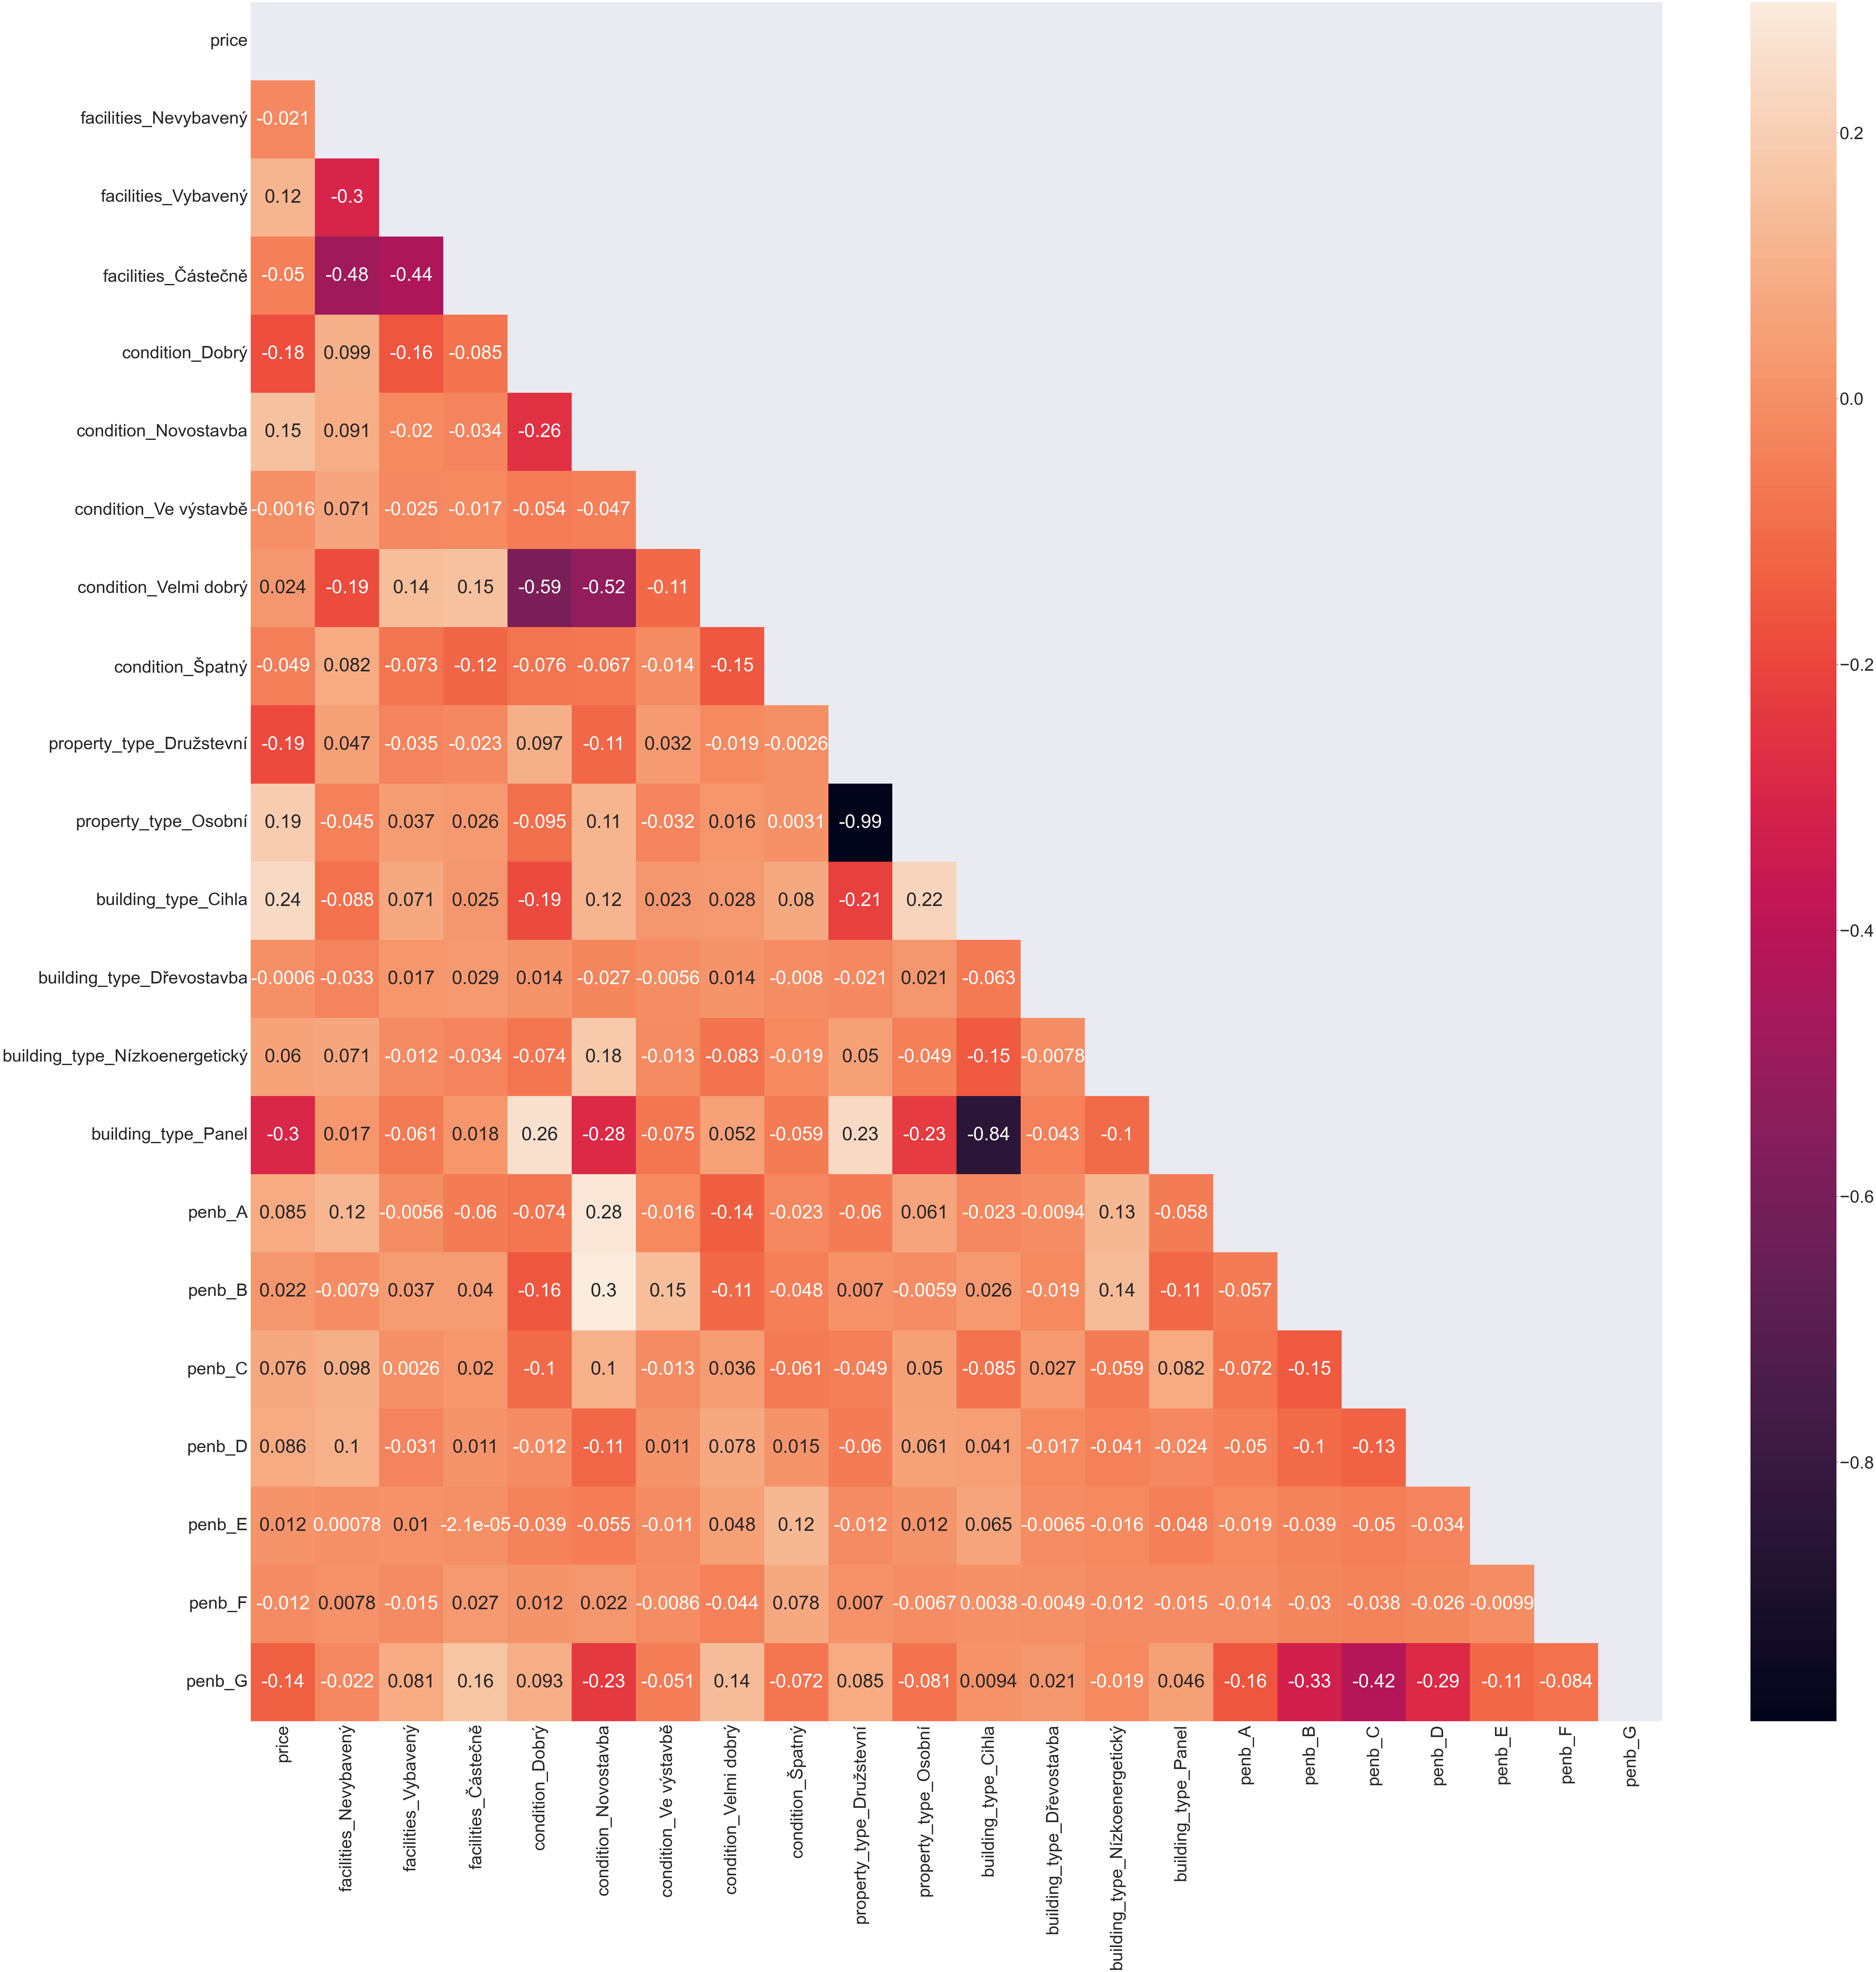

In [76]:
df_all_part_sell = df_all_part[df_all_part['key_offer_type'] == 'prodej']


df_all_part_sell.drop('key_offer_type', axis=1, inplace=True)

x_sell = df_all_part_sell.values

corr_sell = np.corrcoef(x_sell.T)
matrix_sell = np.triu(corr_sell)

plot = sns.heatmap(corr_sell, annot=True, mask=matrix_sell, 
            xticklabels=df_all_part_sell.columns, 
            yticklabels=df_all_part_sell.columns)


sns.set(rc={'figure.figsize':(100, 100)}, font_scale=6)

fig = plot.get_figure()
fig.savefig("corr_sell.png") 

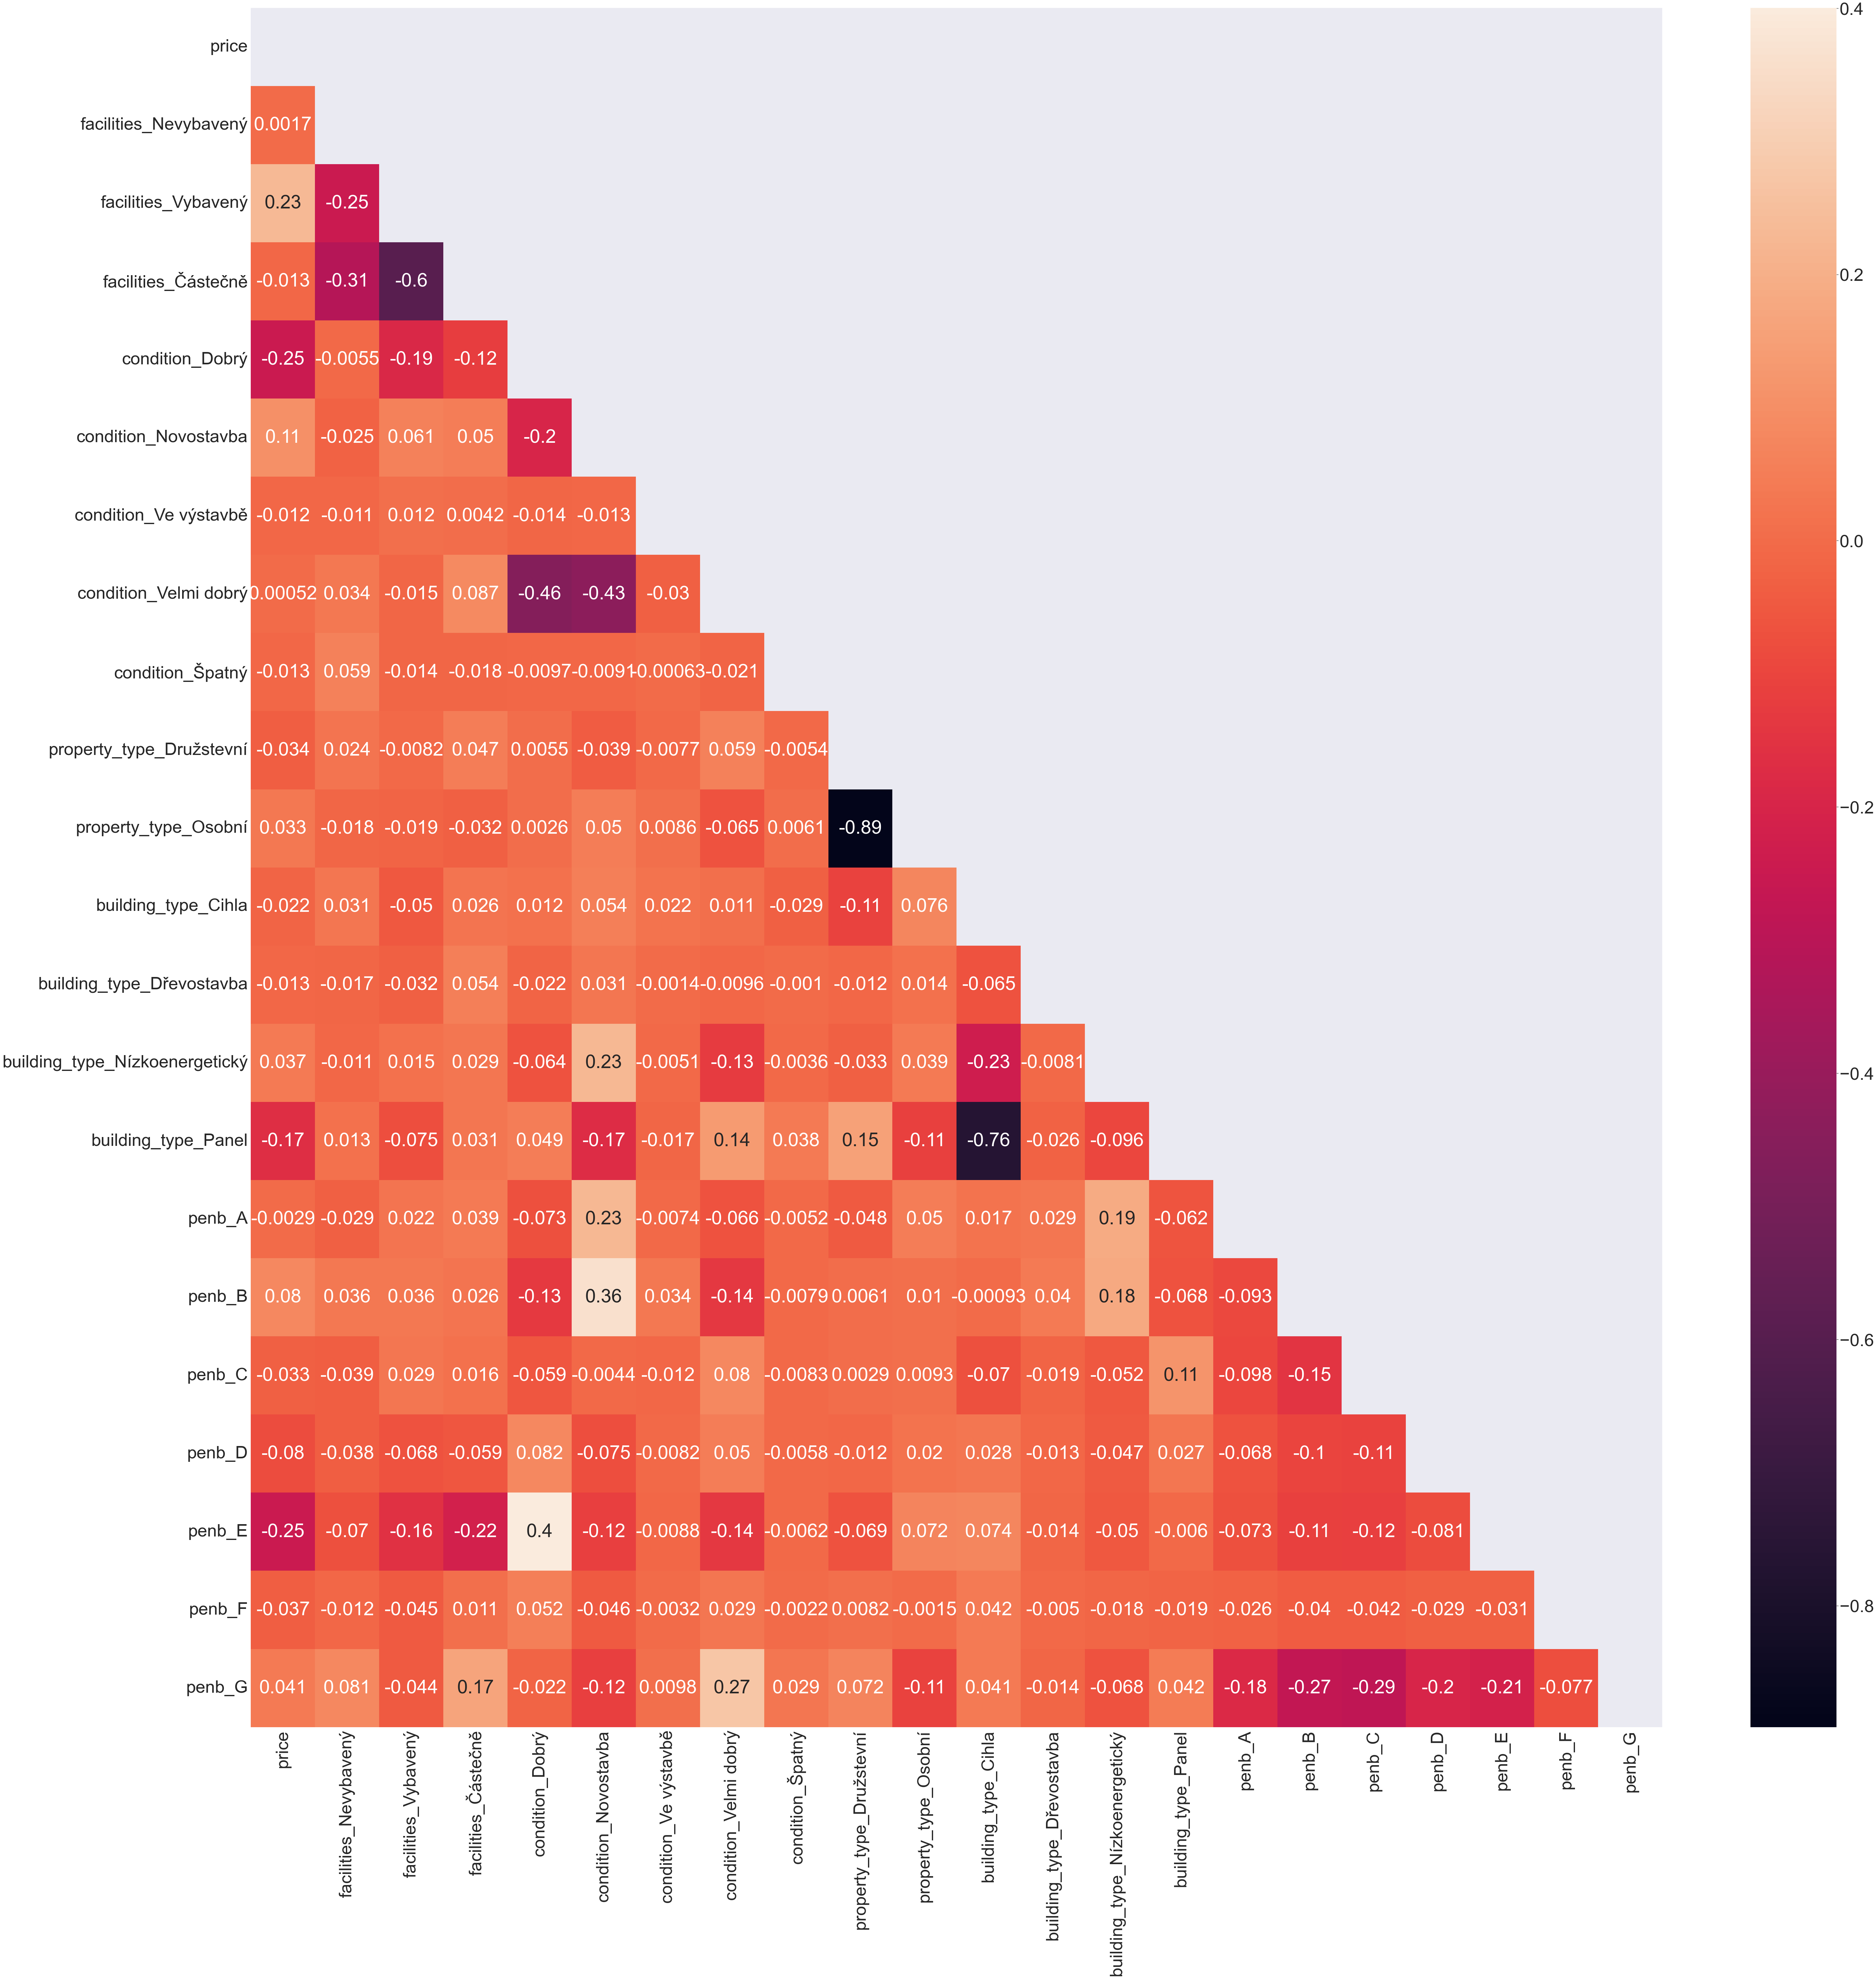

In [79]:
df_all_part_rent = df_all_part[df_all_part['key_offer_type'] == 'pronajem']


df_all_part_rent.drop('key_offer_type', axis=1, inplace=True)

x_rent = df_all_part_rent.values

corr_rent = np.corrcoef(x_rent.T)
matrix_rent = np.triu(corr_rent)

plot = sns.heatmap(corr_rent, annot=True, mask=matrix_rent, 
            xticklabels=df_all_part_rent.columns, 
            yticklabels=df_all_part_rent.columns)


sns.set(rc={'figure.figsize':(100, 100)}, font_scale=5)

fig = plot.get_figure()
fig.savefig("corr_rent.png") 